In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data_train=pd.read_csv("twitter_training.csv")
data_valid=pd.read_csv("twitter_validation.csv")

In [3]:
column_name=["ID","Entity","Sentiment","Content"]
data_train.columns=column_name
data_valid.columns=column_name
data=pd.concat([data_train,data_valid],ignore_index=False)
data.head()

,ID,Entity,Sentiment,Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
data.shape

(75680, 4)

In [5]:
data.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

In [6]:
data.duplicated().sum()

3216

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

ID           0
Entity       0
Sentiment    0
Content      0
dtype: int64

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.duplicated().sum()

0

In [11]:
data["Sentiment"].value_counts()

Negative      21790
Positive      19845
Neutral       17879
Irrelevant    12624
Name: Sentiment, dtype: int64

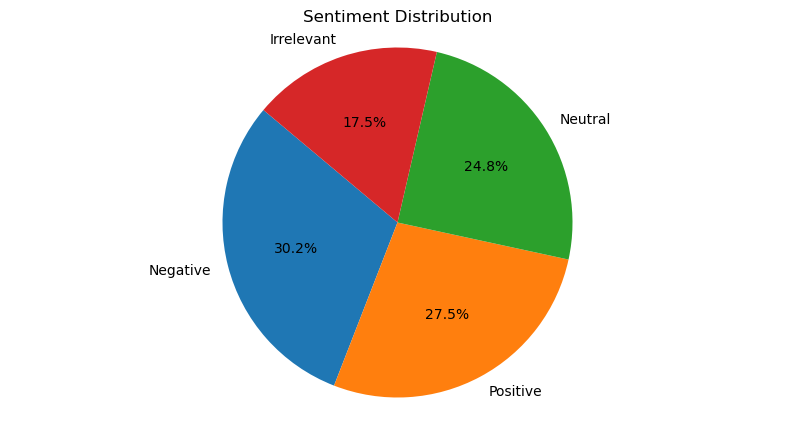

In [12]:
sentiment_counts = data["Sentiment"].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%.1f%%", startangle=140)
plt.title("Sentiment Distribution")
plt.axis("equal")  
plt.show()

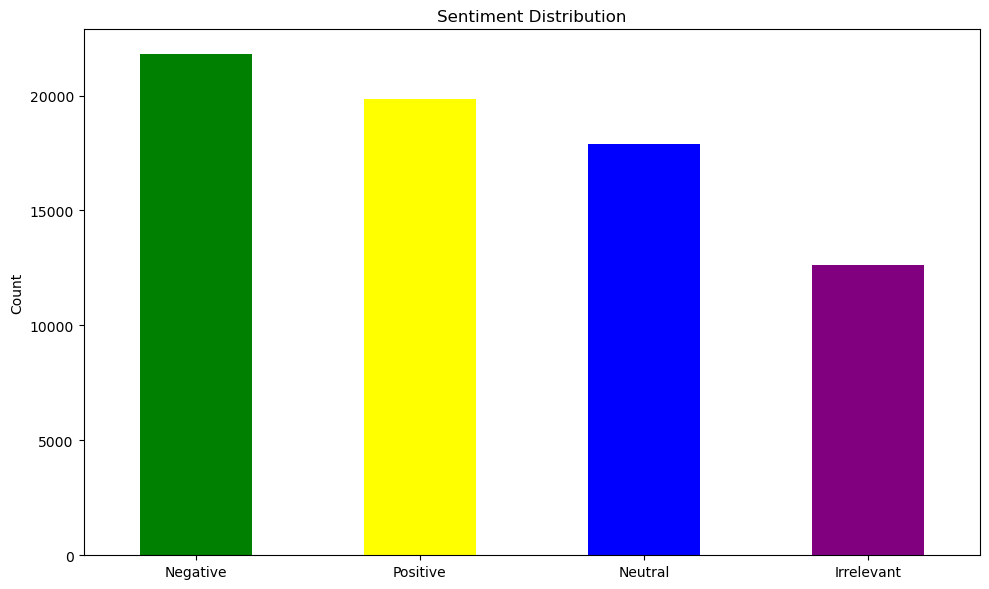

In [13]:
plt.figure(figsize=(10, 6))
sentiment_counts.plot(kind="bar", color=["green", "yellow", "blue","purple"])  
plt.ylabel("Count")
plt.title("Sentiment Distribution")
plt.xticks(rotation=0)  
plt.tight_layout()  
plt.show()

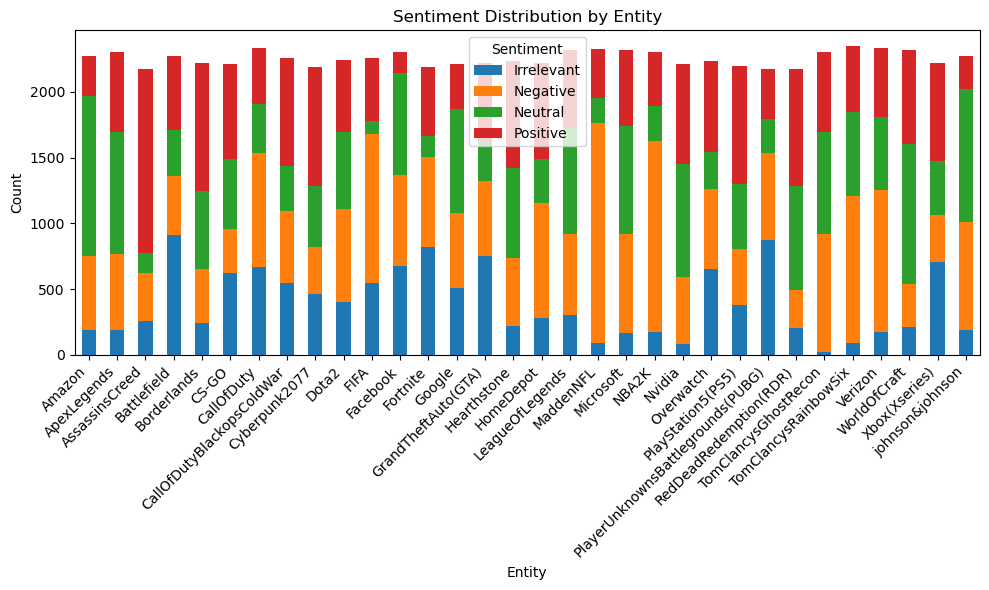

In [14]:
entity_sentiment_counts = data.groupby(["Entity", "Sentiment"]).size().unstack(fill_value=0)

entity_sentiment_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.xlabel("Entity")
plt.ylabel("Count")
plt.title("Sentiment Distribution by Entity")
plt.legend(title="Sentiment")
plt.xticks(rotation=45, ha="right")  
plt.tight_layout()
plt.show()

In [15]:
data.pivot_table(columns="Sentiment", index="Entity", aggfunc="size", fill_value=0)

Sentiment,Irrelevant,Negative,Neutral,Positive
Entity,,,,
Amazon,188,566,1210,306
ApexLegends,188,577,927,613
AssassinsCreed,257,366,155,1393
Battlefield,912,449,345,563
Borderlands,239,415,590,977
CS-GO,624,335,530,721
CallOfDuty,668,865,370,430
CallOfDutyBlackopsColdWar,548,542,343,823
Cyberpunk2077,462,361,458,908


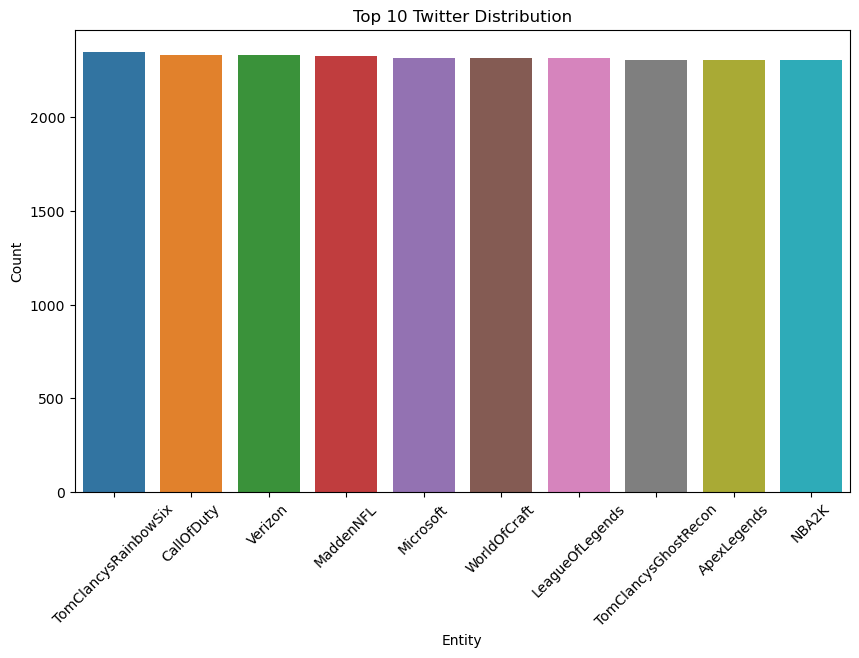

In [16]:
top_ten=data["Entity"].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_ten.index,y=top_ten.values)
plt.title("Top 10 Twitter Distribution")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

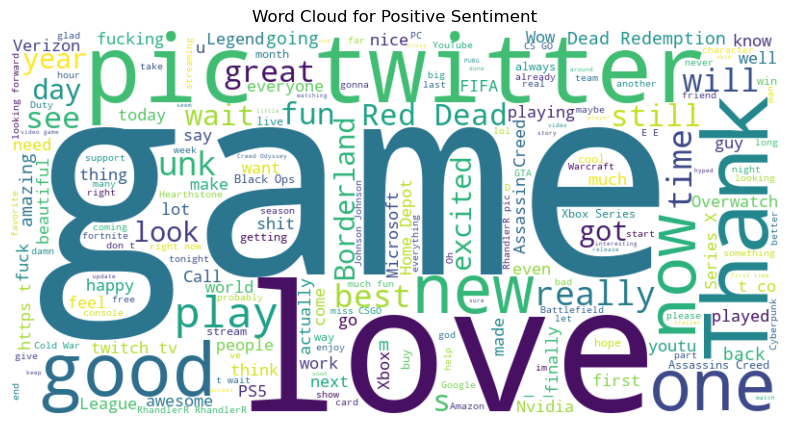

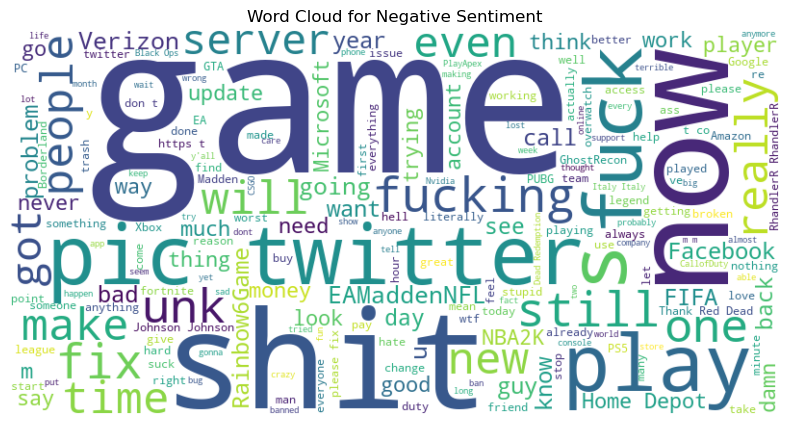

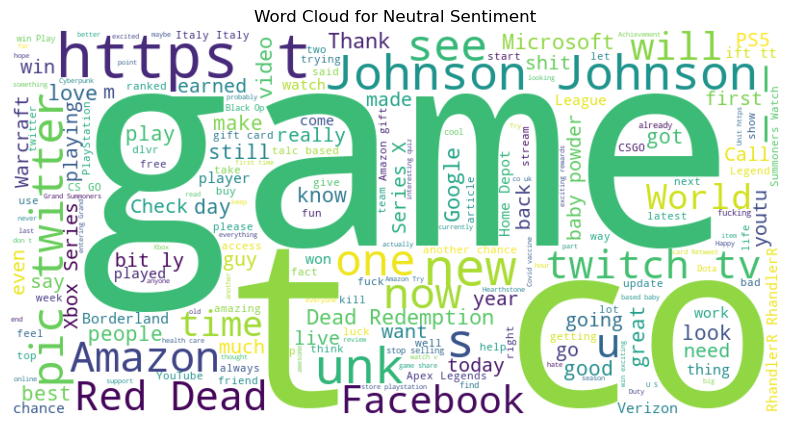

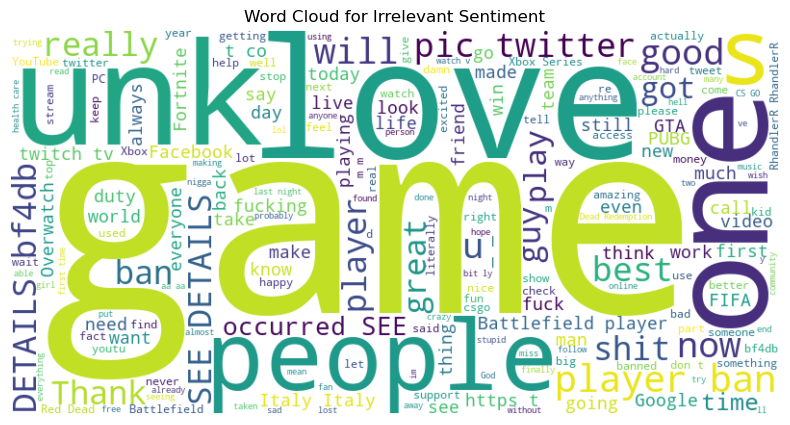

In [18]:
def generate_wordcloud_for_sentiment(data, sentiment):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()

positive_text = data[data['Sentiment'] == "Positive"]["Content"].str.cat(sep=" ")
negative_text = data[data['Sentiment'] == "Negative"]["Content"].str.cat(sep=" ")
neutral_text = data[data['Sentiment'] == "Neutral"]["Content"].str.cat(sep=" ")
irrelavant_text = data[data['Sentiment'] == "Irrelevant"]["Content"].str.cat(sep=" ")

generate_wordcloud_for_sentiment(positive_text, "Positive")
generate_wordcloud_for_sentiment(negative_text, "Negative")
generate_wordcloud_for_sentiment(neutral_text, "Neutral")
generate_wordcloud_for_sentiment(irrelavant_text, "Irrelevant")